In [172]:
import h5py
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import sys
import time
import pandas as pd
import cv2
import os
import imageio
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import shutil
import random

from deepcell.utils.tracking_utils import save_trks

In [177]:
# Input file
fN = h5py.File("../22956814/22956814_featuresN.hdf5")

# Define dorsal and ventral coordinates
coordinates = fN['coordinates']
dorsal = coordinates['dorsal_contours']
ventral = coordinates['ventral_contours']

# trajectory_data and timeseries_data
traj = pd.read_hdf("../22956814/22956814_featuresN.hdf5", '/trajectories_data')
timeseries = fN['timeseries_data']

In [178]:
# Get wells - data from timeseries_data, at position [2]

wells = ['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4']
#wells = [each.encode() for each in wells]

well_dict = {}
for each in wells:
    well_dict[each] = []
    
#print('A1'.encode().decode())
for i, each in enumerate(timeseries[:]):  # "i" == index
    well = each[2].decode()
    if well in well_dict.keys():
        well_dict[well].append(i)

In [175]:
# ---------------------------NEW---------------------------------------

import gc

def make_lineage(well, mask_npy, suffix):
    """suffix = the number at the end of the mask_npy"""
    
    array = np.load(mask_npy)
    unique_worm_ids = list(np.unique(array))[1:]
    
    txt = '../22956814/%s_not_empty.txt' % well
    with open(txt, 'r') as f:
        start_end_samplings = f.read().splitlines()  # Cool!! 
        frame_start, frame_end, down_sampling = start_end_samplings[suffix-1].split(",")
        sampling = range(int(frame_start), int(frame_end)+1, int(down_sampling))
            
    pd = traj.loc[well_dict[well], :]
    lineages = {}
    
    for worm in unique_worm_ids:
        #worm_pd = pd.loc[pd['worm_index_joined'] == worm]

        nested_dict = {}
        nested_dict['label'] = int(worm)

        frame_list = [] 
        
        for i, frame in enumerate(array[:]):
            unique_pixels = list(np.unique(frame))
            if worm in unique_pixels:
                frame_list.append(i)
                
        nested_dict = {}
        #nested_dict['label'] = int(worm)
        nested_dict['frames'] = frame_list
        nested_dict['daughters'] = []
        nested_dict['capped'] = False
        nested_dict['frame-div'] = None
        nested_dict['parent'] = None

        lineages[int(worm)] = nested_dict
    
    del array
    gc.collect()
        
    return lineages

In [179]:
a1_1 = make_lineage('A1', "../22956814/A1_mask_1.npy", 1) 

# Well A2
a2_1 = make_lineage('A2', "../22956814/A2_mask_1.npy", 1) 
a2_2 = make_lineage('A2', "../22956814/A2_mask_2.npy", 2) 
a2_3 = make_lineage('A2', "../22956814/A2_mask_3.npy", 3) 
a2_4 = make_lineage('A2', "../22956814/A2_mask_4.npy", 4) 
a2_5 = make_lineage('A2', "../22956814/A2_mask_5.npy", 5) 
a2_6 = make_lineage('A2', "../22956814/A2_mask_6.npy", 6) 
a2_7 = make_lineage('A2', "../22956814/A2_mask_7.npy", 7) 
a2_8 = make_lineage('A2', "../22956814/A2_mask_8.npy", 8) 
a2_9 = make_lineage('A2', "../22956814/A2_mask_9.npy", 9) 
a2_10 = make_lineage('A2', "../22956814/A2_mask_10.npy", 10) 

# Well A3
a3_1 = make_lineage('A3', "../22956814/A3_mask_1.npy", 1) 
a3_2 = make_lineage('A3', "../22956814/A3_mask_2.npy", 2) 
a3_3 = make_lineage('A3', "../22956814/A3_mask_3.npy", 3) 
a3_4 = make_lineage('A3', "../22956814/A3_mask_4.npy", 4) 
a3_5 = make_lineage('A3', "../22956814/A3_mask_5.npy", 5) 
a3_6 = make_lineage('A3', "../22956814/A3_mask_6.npy", 6) 
a3_7 = make_lineage('A3', "../22956814/A3_mask_7.npy", 7) 
a3_8 = make_lineage('A3', "../22956814/A3_mask_8.npy", 8) 
a3_9 = make_lineage('A3', "../22956814/A3_mask_9.npy", 9) 

# Well A4
a4_1 = make_lineage('A4', "../22956814/A4_mask_1.npy", 1) 
a4_2 = make_lineage('A4', "../22956814/A4_mask_2.npy", 2) 
a4_3 = make_lineage('A4', "../22956814/A4_mask_3.npy", 3) 
#a4_4 = make_lineage('A4', "../22956814/A4_mask_4.npy", 4)   # These two are empty, delete
#a4_5 = make_lineage('A4', "../22956814/A4_mask_5.npy", 5) 

In [140]:
import psutil
psutil.virtual_memory()

svmem(total=439595151360, available=391252885504, percent=11.0, used=44678139904, free=287632228352, active=46589947904, inactive=101734264832, buffers=146366464, cached=107138416640, shared=9052160, slab=3000115200)

In [141]:
del fN
del timeseries
del traj
gc.collect()

132

In [143]:
del well_dict
gc.collect()

44

In [180]:
psutil.virtual_memory()

svmem(total=439595151360, available=364516405248, percent=17.1, used=71414652928, free=256613752832, active=83062956032, inactive=96218177536, buffers=148705280, cached=111418040320, shared=9052160, slab=3010588672)

# Well Bs

In [181]:
b1_1 = make_lineage('B1', "../22956814/B1_mask_1.npy", 1)
b1_2 = make_lineage('B1', "../22956814/B1_mask_2.npy", 2)

b2_1 = make_lineage('B2', "../22956814/B2_mask_1.npy", 1)
b2_2 = make_lineage('B2', "../22956814/B2_mask_2.npy", 2)
b2_3 = make_lineage('B2', "../22956814/B2_mask_3.npy", 3)
b2_4 = make_lineage('B2', "../22956814/B2_mask_4.npy", 4)

b3_1 = make_lineage('B3', "../22956814/B3_mask_1.npy", 1)
b3_2 = make_lineage('B3', "../22956814/B3_mask_2.npy", 2)
b3_3 = make_lineage('B3', "../22956814/B3_mask_3.npy", 3)
b3_4 = make_lineage('B3', "../22956814/B3_mask_4.npy", 4)
b3_5 = make_lineage('B3', "../22956814/B3_mask_5.npy", 5)
b3_6 = make_lineage('B3', "../22956814/B3_mask_6.npy", 6)

b4_1 = make_lineage('B4', "../22956814/B4_mask_1.npy", 1)
b4_2 = make_lineage('B4', "../22956814/B4_mask_2.npy", 2)
b4_3 = make_lineage('B4', "../22956814/B4_mask_3.npy", 3)

# Well Cs

In [182]:
c1_1 = make_lineage('C1', "../22956814/C1_mask_1.npy", 1)
c1_2 = make_lineage('C1', "../22956814/C1_mask_2.npy", 2)
c1_3 = make_lineage('C1', "../22956814/C1_mask_3.npy", 3)
c1_4 = make_lineage('C1', "../22956814/C1_mask_4.npy", 4)
c1_5 = make_lineage('C1', "../22956814/C1_mask_5.npy", 5)
c1_6 = make_lineage('C1', "../22956814/C1_mask_6.npy", 6)
c1_7 = make_lineage('C1', "../22956814/C1_mask_7.npy", 7)
c1_8 = make_lineage('C1', "../22956814/C1_mask_8.npy", 8)
c1_9 = make_lineage('C1', "../22956814/C1_mask_9.npy", 9)
c1_10 = make_lineage('C1', "../22956814/C1_mask_10.npy", 10)
c1_11 = make_lineage('C1', "../22956814/C1_mask_11.npy", 11)
c1_12 = make_lineage('C1', "../22956814/C1_mask_12.npy", 12)
c1_13 = make_lineage('C1', "../22956814/C1_mask_13.npy", 13)
c1_14 = make_lineage('C1', "../22956814/C1_mask_14.npy", 14)
c1_15 = make_lineage('C1', "../22956814/C1_mask_15.npy", 15)
c1_16 = make_lineage('C1', "../22956814/C1_mask_16.npy", 16)
c1_17 = make_lineage('C1', "../22956814/C1_mask_17.npy", 17)

c2_1 = make_lineage('C2', "../22956814/C2_mask_1.npy", 1)
c2_2 = make_lineage('C2', "../22956814/C2_mask_2.npy", 2)
c2_3 = make_lineage('C2', "../22956814/C2_mask_3.npy", 3)
c2_4 = make_lineage('C2', "../22956814/C2_mask_4.npy", 4)
c2_5 = make_lineage('C2', "../22956814/C2_mask_5.npy", 5)
c2_6 = make_lineage('C2', "../22956814/C2_mask_6.npy", 6)

c3_1 = make_lineage('C3', "../22956814/C3_mask_1.npy", 1)
c3_2 = make_lineage('C3', "../22956814/C3_mask_2.npy", 2)
c3_3 = make_lineage('C3', "../22956814/C3_mask_3.npy", 3)
c3_4 = make_lineage('C3', "../22956814/C3_mask_4.npy", 4)
c3_5 = make_lineage('C3', "../22956814/C3_mask_5.npy", 5)
c3_6 = make_lineage('C3', "../22956814/C3_mask_6.npy", 6)
c3_7 = make_lineage('C3', "../22956814/C3_mask_7.npy", 7)
c3_8 = make_lineage('C3', "../22956814/C3_mask_8.npy", 8)
c3_9 = make_lineage('C3', "../22956814/C3_mask_9.npy", 9)
c3_10 = make_lineage('C3', "../22956814/C3_mask_10.npy", 10)
c3_11 = make_lineage('C3', "../22956814/C3_mask_11.npy", 11)

c4_1 = make_lineage('C4', "../22956814/C4_mask_1.npy", 1)
c4_2 = make_lineage('C4', "../22956814/C4_mask_2.npy", 2)
c4_3 = make_lineage('C4', "../22956814/C4_mask_3.npy", 3)
c4_4 = make_lineage('C4', "../22956814/C4_mask_4.npy", 4)

# Well Ds

In [183]:
d1_1 = make_lineage('D1', "../22956814/D1_mask_1.npy", 1)
d1_2 = make_lineage('D1', "../22956814/D1_mask_2.npy", 2)
d1_3 = make_lineage('D1', "../22956814/D1_mask_3.npy", 3)
d1_4 = make_lineage('D1', "../22956814/D1_mask_4.npy", 4)
d1_5 = make_lineage('D1', "../22956814/D1_mask_5.npy", 5)
d1_6 = make_lineage('D1', "../22956814/D1_mask_6.npy", 6)
d1_7 = make_lineage('D1', "../22956814/D1_mask_7.npy", 7)
d1_8 = make_lineage('D1', "../22956814/D1_mask_8.npy", 8)
d1_9 = make_lineage('D1', "../22956814/D1_mask_9.npy", 9)
d1_10 = make_lineage('D1', "../22956814/D1_mask_10.npy", 10)
d1_11 = make_lineage('D1', "../22956814/D1_mask_11.npy", 11)
d1_12 = make_lineage('D1', "../22956814/D1_mask_12.npy", 12)
d1_13 = make_lineage('D1', "../22956814/D1_mask_13.npy", 13)

d2_1 = make_lineage('D2', "../22956814/D2_mask_1.npy", 1)
d2_2 = make_lineage('D2', "../22956814/D2_mask_2.npy", 2)
d2_3 = make_lineage('D2', "../22956814/D2_mask_3.npy", 3)
d2_4 = make_lineage('D2', "../22956814/D2_mask_4.npy", 4)
d2_5 = make_lineage('D2', "../22956814/D2_mask_5.npy", 5)
d2_6 = make_lineage('D2', "../22956814/D2_mask_6.npy", 6)
d2_7 = make_lineage('D2', "../22956814/D2_mask_7.npy", 7)
d2_8 = make_lineage('D2', "../22956814/D2_mask_8.npy", 8)
d2_9 = make_lineage('D2', "../22956814/D2_mask_9.npy", 9)
d2_10 = make_lineage('D2', "../22956814/D2_mask_10.npy", 10)

d3_1 = make_lineage('D3', "../22956814/D3_mask_1.npy", 1)
d3_2 = make_lineage('D3', "../22956814/D3_mask_2.npy", 2)
d3_3 = make_lineage('D3', "../22956814/D3_mask_3.npy", 3)
d3_4 = make_lineage('D3', "../22956814/D3_mask_4.npy", 4)
d3_5 = make_lineage('D3', "../22956814/D3_mask_5.npy", 5)
d3_6 = make_lineage('D3', "../22956814/D3_mask_6.npy", 6)
d3_7 = make_lineage('D3', "../22956814/D3_mask_7.npy", 7)
d3_8 = make_lineage('D3', "../22956814/D3_mask_8.npy", 8)
d3_9 = make_lineage('D3', "../22956814/D3_mask_9.npy", 9)
d3_10 = make_lineage('D3', "../22956814/D3_mask_10.npy", 10)
d3_11 = make_lineage('D3', "../22956814/D3_mask_11.npy", 11)
d3_12 = make_lineage('D3', "../22956814/D3_mask_12.npy", 12)
d3_13 = make_lineage('D3', "../22956814/D3_mask_13.npy", 13)
d3_14 = make_lineage('D3', "../22956814/D3_mask_14.npy", 14)
d3_15 = make_lineage('D3', "../22956814/D3_mask_15.npy", 15)

d4_1 = make_lineage('D4', "../22956814/D4_mask_1.npy", 1)
d4_2 = make_lineage('D4', "../22956814/D4_mask_2.npy", 2)
d4_3 = make_lineage('D4', "../22956814/D4_mask_3.npy", 3)
d4_4 = make_lineage('D4', "../22956814/D4_mask_4.npy", 4)
d4_5 = make_lineage('D4', "../22956814/D4_mask_5.npy", 5)
d4_6 = make_lineage('D4', "../22956814/D4_mask_6.npy", 6)
d4_7 = make_lineage('D4', "../22956814/D4_mask_7.npy", 7)
d4_8 = make_lineage('D4', "../22956814/D4_mask_8.npy", 8)
d4_9 = make_lineage('D4', "../22956814/D4_mask_9.npy", 9)
d4_10 = make_lineage('D4', "../22956814/D4_mask_10.npy", 10)
d4_11 = make_lineage('D4', "../22956814/D4_mask_11.npy", 11)
d4_12 = make_lineage('D4', "../22956814/D4_mask_12.npy", 12)
d4_13 = make_lineage('D4', "../22956814/D4_mask_13.npy", 13)
d4_14 = make_lineage('D4', "../22956814/D4_mask_14.npy", 14)
d4_15 = make_lineage('D4', "../22956814/D4_mask_15.npy", 15)
d4_16 = make_lineage('D4', "../22956814/D4_mask_16.npy", 16)
d4_17 = make_lineage('D4', "../22956814/D4_mask_17.npy", 17)

In [150]:
# Load them all into .trks

masks_fn = [
    "../22956814/A1_mask_1.npy",
    "../22956814/A2_mask_1.npy",
    "../22956814/A2_mask_2.npy",
    "../22956814/A2_mask_3.npy",
    "../22956814/A2_mask_4.npy",
    "../22956814/A2_mask_5.npy",
    "../22956814/A2_mask_6.npy",
    "../22956814/A2_mask_7.npy",
    "../22956814/A2_mask_8.npy",
    "../22956814/A2_mask_9.npy",
    "../22956814/A2_mask_10.npy", 
    "../22956814/A3_mask_1.npy",
    "../22956814/A3_mask_2.npy",
    "../22956814/A3_mask_3.npy",
    "../22956814/A3_mask_4.npy",
    "../22956814/A3_mask_5.npy",
    "../22956814/A3_mask_6.npy",
    "../22956814/A3_mask_7.npy",
    "../22956814/A3_mask_8.npy",
    "../22956814/A3_mask_9.npy",
    "../22956814/A4_mask_1.npy",
    "../22956814/A4_mask_2.npy",
    "../22956814/A4_mask_3.npy",

    "../22956814/B1_mask_1.npy",
    "../22956814/B1_mask_2.npy",
    "../22956814/B2_mask_1.npy",
    "../22956814/B2_mask_2.npy",
    "../22956814/B2_mask_3.npy",
    "../22956814/B2_mask_4.npy",
    "../22956814/B3_mask_1.npy",
    "../22956814/B3_mask_2.npy",
    "../22956814/B3_mask_3.npy",
    "../22956814/B3_mask_4.npy",
    "../22956814/B3_mask_5.npy",
    "../22956814/B3_mask_6.npy",
    "../22956814/B4_mask_1.npy",
    "../22956814/B4_mask_2.npy",
    "../22956814/B4_mask_3.npy",
    
    "../22956814/C1_mask_1.npy",
    "../22956814/C1_mask_2.npy",
    "../22956814/C1_mask_3.npy",
    "../22956814/C1_mask_4.npy",
    "../22956814/C1_mask_5.npy",
    "../22956814/C1_mask_6.npy",
    "../22956814/C1_mask_7.npy",
    "../22956814/C1_mask_8.npy",
    "../22956814/C1_mask_9.npy",
    "../22956814/C1_mask_10.npy",
    "../22956814/C1_mask_11.npy",
    "../22956814/C1_mask_12.npy",
    "../22956814/C1_mask_13.npy",
    "../22956814/C1_mask_14.npy",
    "../22956814/C1_mask_15.npy",
    "../22956814/C1_mask_16.npy",
    "../22956814/C1_mask_17.npy",
    "../22956814/C2_mask_1.npy",
    "../22956814/C2_mask_2.npy",
    "../22956814/C2_mask_3.npy",
    "../22956814/C2_mask_4.npy",
    "../22956814/C2_mask_5.npy",
    "../22956814/C2_mask_6.npy",
    "../22956814/C3_mask_1.npy",
    "../22956814/C3_mask_2.npy",
    "../22956814/C3_mask_3.npy",
    "../22956814/C3_mask_4.npy",
    "../22956814/C3_mask_5.npy",
    "../22956814/C3_mask_6.npy",
    "../22956814/C3_mask_7.npy",
    "../22956814/C3_mask_8.npy",
    "../22956814/C3_mask_9.npy",
    "../22956814/C3_mask_10.npy",
    "../22956814/C3_mask_11.npy",
    "../22956814/C4_mask_1.npy",
    "../22956814/C4_mask_2.npy",
    "../22956814/C4_mask_3.npy",
    "../22956814/C4_mask_4.npy",
    
    "../22956814/D1_mask_1.npy",
    "../22956814/D1_mask_2.npy",
    "../22956814/D1_mask_3.npy",
    "../22956814/D1_mask_4.npy",
    "../22956814/D1_mask_5.npy",
    "../22956814/D1_mask_6.npy",
    "../22956814/D1_mask_7.npy",
    "../22956814/D1_mask_8.npy",
    "../22956814/D1_mask_9.npy",
    "../22956814/D1_mask_10.npy",
    "../22956814/D1_mask_11.npy",
    "../22956814/D1_mask_12.npy",
    "../22956814/D1_mask_13.npy",
    "../22956814/D2_mask_1.npy",
    "../22956814/D2_mask_2.npy",
    "../22956814/D2_mask_3.npy",
    "../22956814/D2_mask_4.npy",
    "../22956814/D2_mask_5.npy",
    "../22956814/D2_mask_6.npy",
    "../22956814/D2_mask_7.npy",
    "../22956814/D2_mask_8.npy",
    "../22956814/D2_mask_9.npy",
    "../22956814/D2_mask_10.npy",
    "../22956814/D3_mask_1.npy",
    "../22956814/D3_mask_2.npy",
    "../22956814/D3_mask_3.npy",
    "../22956814/D3_mask_4.npy",
    "../22956814/D3_mask_5.npy",
    "../22956814/D3_mask_6.npy",
    "../22956814/D3_mask_7.npy",
    "../22956814/D3_mask_8.npy",
    "../22956814/D3_mask_9.npy",
    "../22956814/D3_mask_10.npy",
    "../22956814/D3_mask_11.npy",
    "../22956814/D3_mask_12.npy",
    "../22956814/D3_mask_13.npy",
    "../22956814/D3_mask_14.npy",
    "../22956814/D3_mask_15.npy",
    "../22956814/D4_mask_1.npy",
    "../22956814/D4_mask_2.npy",
    "../22956814/D4_mask_3.npy",
    "../22956814/D4_mask_4.npy",
    "../22956814/D4_mask_5.npy",
    "../22956814/D4_mask_6.npy",
    "../22956814/D4_mask_7.npy",
    "../22956814/D4_mask_8.npy",
    "../22956814/D4_mask_9.npy",
    "../22956814/D4_mask_10.npy",
    "../22956814/D4_mask_11.npy",
    "../22956814/D4_mask_12.npy",
    "../22956814/D4_mask_13.npy",
    "../22956814/D4_mask_14.npy",
    "../22956814/D4_mask_15.npy",
    "../22956814/D4_mask_16.npy",
    "../22956814/D4_mask_17.npy"
]


In [151]:
raws_fn = [
    "../22956814/A1_raw_1.npy",
    "../22956814/A2_raw_1.npy",
    "../22956814/A2_raw_2.npy",
    "../22956814/A2_raw_3.npy",
    "../22956814/A2_raw_4.npy",
    "../22956814/A2_raw_5.npy",
    "../22956814/A2_raw_6.npy",
    "../22956814/A2_raw_7.npy",
    "../22956814/A2_raw_8.npy",
    "../22956814/A2_raw_9.npy",
    "../22956814/A2_raw_10.npy", 
    "../22956814/A3_raw_1.npy",
    "../22956814/A3_raw_2.npy",
    "../22956814/A3_raw_3.npy",
    "../22956814/A3_raw_4.npy",
    "../22956814/A3_raw_5.npy",
    "../22956814/A3_raw_6.npy",
    "../22956814/A3_raw_7.npy",
    "../22956814/A3_raw_8.npy",
    "../22956814/A3_raw_9.npy",
    "../22956814/A4_raw_1.npy",
    "../22956814/A4_raw_2.npy",
    "../22956814/A4_raw_3.npy",

    "../22956814/B1_raw_1.npy",
    "../22956814/B1_raw_2.npy",
    "../22956814/B2_raw_1.npy",
    "../22956814/B2_raw_2.npy",
    "../22956814/B2_raw_3.npy",
    "../22956814/B2_raw_4.npy",
    "../22956814/B3_raw_1.npy",
    "../22956814/B3_raw_2.npy",
    "../22956814/B3_raw_3.npy",
    "../22956814/B3_raw_4.npy",
    "../22956814/B3_raw_5.npy",
    "../22956814/B3_raw_6.npy",
    "../22956814/B4_raw_1.npy",
    "../22956814/B4_raw_2.npy",
    "../22956814/B4_raw_3.npy",
    
    "../22956814/C1_raw_1.npy",
    "../22956814/C1_raw_2.npy",
    "../22956814/C1_raw_3.npy",
    "../22956814/C1_raw_4.npy",
    "../22956814/C1_raw_5.npy",
    "../22956814/C1_raw_6.npy",
    "../22956814/C1_raw_7.npy",
    "../22956814/C1_raw_8.npy",
    "../22956814/C1_raw_9.npy",
    "../22956814/C1_raw_10.npy",
    "../22956814/C1_raw_11.npy",
    "../22956814/C1_raw_12.npy",
    "../22956814/C1_raw_13.npy",
    "../22956814/C1_raw_14.npy",
    "../22956814/C1_raw_15.npy",
    "../22956814/C1_raw_16.npy",
    "../22956814/C1_raw_17.npy",
    "../22956814/C2_raw_1.npy",
    "../22956814/C2_raw_2.npy",
    "../22956814/C2_raw_3.npy",
    "../22956814/C2_raw_4.npy",
    "../22956814/C2_raw_5.npy",
    "../22956814/C2_raw_6.npy",
    "../22956814/C3_raw_1.npy",
    "../22956814/C3_raw_2.npy",
    "../22956814/C3_raw_3.npy",
    "../22956814/C3_raw_4.npy",
    "../22956814/C3_raw_5.npy",
    "../22956814/C3_raw_6.npy",
    "../22956814/C3_raw_7.npy",
    "../22956814/C3_raw_8.npy",
    "../22956814/C3_raw_9.npy",
    "../22956814/C3_raw_10.npy",
    "../22956814/C3_raw_11.npy",
    "../22956814/C4_raw_1.npy",
    "../22956814/C4_raw_2.npy",
    "../22956814/C4_raw_3.npy",
    "../22956814/C4_raw_4.npy",
    
    "../22956814/D1_raw_1.npy",
    "../22956814/D1_raw_2.npy",
    "../22956814/D1_raw_3.npy",
    "../22956814/D1_raw_4.npy",
    "../22956814/D1_raw_5.npy",
    "../22956814/D1_raw_6.npy",
    "../22956814/D1_raw_7.npy",
    "../22956814/D1_raw_8.npy",
    "../22956814/D1_raw_9.npy",
    "../22956814/D1_raw_10.npy",
    "../22956814/D1_raw_11.npy",
    "../22956814/D1_raw_12.npy",
    "../22956814/D1_raw_13.npy",
    "../22956814/D2_raw_1.npy",
    "../22956814/D2_raw_2.npy",
    "../22956814/D2_raw_3.npy",
    "../22956814/D2_raw_4.npy",
    "../22956814/D2_raw_5.npy",
    "../22956814/D2_raw_6.npy",
    "../22956814/D2_raw_7.npy",
    "../22956814/D2_raw_8.npy",
    "../22956814/D2_raw_9.npy",
    "../22956814/D2_raw_10.npy",
    "../22956814/D3_raw_1.npy",
    "../22956814/D3_raw_2.npy",
    "../22956814/D3_raw_3.npy",
    "../22956814/D3_raw_4.npy",
    "../22956814/D3_raw_5.npy",
    "../22956814/D3_raw_6.npy",
    "../22956814/D3_raw_7.npy",
    "../22956814/D3_raw_8.npy",
    "../22956814/D3_raw_9.npy",
    "../22956814/D3_raw_10.npy",
    "../22956814/D3_raw_11.npy",
    "../22956814/D3_raw_12.npy",
    "../22956814/D3_raw_13.npy",
    "../22956814/D3_raw_14.npy",
    "../22956814/D3_raw_15.npy",
    "../22956814/D4_raw_1.npy",
    "../22956814/D4_raw_2.npy",
    "../22956814/D4_raw_3.npy",
    "../22956814/D4_raw_4.npy",
    "../22956814/D4_raw_5.npy",
    "../22956814/D4_raw_6.npy",
    "../22956814/D4_raw_7.npy",
    "../22956814/D4_raw_8.npy",
    "../22956814/D4_raw_9.npy",
    "../22956814/D4_raw_10.npy",
    "../22956814/D4_raw_11.npy",
    "../22956814/D4_raw_12.npy",
    "../22956814/D4_raw_13.npy",
    "../22956814/D4_raw_14.npy",
    "../22956814/D4_raw_15.npy",
    "../22956814/D4_raw_16.npy",
    "../22956814/D4_raw_17.npy"
]

In [192]:
y = []
y_indices = []

for i, mask in enumerate(masks_fn):
    mask_array = np.load(mask)
    if mask_array.shape[0] == 100:
        y.append(mask_array)
        y_indices.append(i)

In [194]:
print(len(y))
print(len(y_indices))

88
88


In [198]:
X = []

for i in y_indices:
    raw_array = np.load(raws_fn[i])
    X.append(raw_array)

In [200]:
print(len(X))

88


In [184]:
lineages = [
    a1_1,
    a2_1,
    a2_2,
    a2_3,
    a2_4,
    a2_5,
    a2_6,
    a2_7,
    a2_8,
    a2_9,
    a2_10,
    a3_1, 
    a3_2, 
    a3_3, 
    a3_4, 
    a3_5, 
    a3_6, 
    a3_7, 
    a3_8, 
    a3_9, 
    a4_1, 
    a4_2, 
    a4_3, 
    
    b1_1,
    b1_2,
    b2_1,
    b2_2,
    b2_3,
    b2_4,
    b3_1,
    b3_2,
    b3_3,
    b3_4,
    b3_5,
    b3_6,
    b4_1,
    b4_2,
    b4_3,
    
    c1_1,
    c1_2,
    c1_3,
    c1_4,
    c1_5,
    c1_6,
    c1_7,
    c1_8,
    c1_9,
    c1_10,
    c1_11,
    c1_12,
    c1_13,
    c1_14,
    c1_15,
    c1_16,
    c1_17,
    c2_1,
    c2_2,
    c2_3,
    c2_4,
    c2_5,
    c2_6,
    c3_1,
    c3_2,
    c3_3,
    c3_4,
    c3_5,
    c3_6,
    c3_7,
    c3_8,
    c3_9,
    c3_10,
    c3_11,
    c4_1,
    c4_2,
    c4_3,
    c4_4,
    
    d1_1,
    d1_2,
    d1_3,
    d1_4,
    d1_5,
    d1_6,
    d1_7,
    d1_8,
    d1_9,
    d1_10,
    d1_11,
    d1_12,
    d1_13,
    d2_1,
    d2_2,
    d2_3,
    d2_4,
    d2_5,
    d2_6,
    d2_7,
    d2_8,
    d2_9,
    d2_10,
    d3_1,
    d3_2,
    d3_3,
    d3_4,
    d3_5,
    d3_6,
    d3_7,
    d3_8,
    d3_9,
    d3_10,
    d3_11,
    d3_12,
    d3_13,
    d3_14,
    d3_15,
    d4_1,
    d4_2,
    d4_3,
    d4_4,
    d4_5,
    d4_6,
    d4_7,
    d4_8,
    d4_9,
    d4_10,
    d4_11,
    d4_12,
    d4_13,
    d4_14,
    d4_15,
    d4_16,
    d4_17
]

In [185]:
len(lineages)

131

In [201]:
lineages_true = []

for i in y_indices:
    lineages_true.append(lineages[i])

In [202]:
print(len(lineages_true))

88


In [206]:
save_trks("../22956814.trks", lineages_true, X, y)

In [208]:
from deepcell.utils.tracking_utils import trks_stats

trks_stats("../22956814.trks")

####### IMPORTANT! error ALERT!!!

Dataset Statistics: 
Image data shape:  (88, 100, 530, 530, 1)
Number of lineages (should equal batch size):  88


/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  ...
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars


Total number of unique tracks (cells)      -  153
Total number of divisions                  -  0
Average cell density (cells/100 sq pixels) -  0.0004411145991779669


ValueError: cannot convert float NaN to integer

In [72]:
# Check gif

def plot_gif(np_array, output_fn):
    mpl.rcParams['image.interpolation'] = 'none'  # Prevent mpl smoothes the edges
    os.mkdir("pic_temporary")  # To temporarily store the files

    #spring = cm.get_cmap('spring', 256)
    #newcolors = spring(np.linspace(0, 256, 256))
    #black = np.array([0/256, 0/256, 0/256, 1])
    #newcolors[:1, :] = black
    #newcmp = ListedColormap(newcolors)

    pic_list = []
    flag = 0

    for i in range(np_array.shape[0]):
        #plt.imshow(np_array[i], cmap=newcmp)
        mask = np_array[i]
        mask = np.where(mask==0, -1, mask) 
        #print(np.unique(mask_1))

        value = -1
        masked_array = np.ma.masked_where(mask == value, mask)

        #cmap = mpl.cm.get_cmap("spring")
        cmap = mpl.cm.get_cmap("spring").copy()
        cmap.set_bad(color='black')
        
        plt.imshow(masked_array, cmap=cmap)
        
        fn = 'pic_temporary/%d.jpg' % flag
        plt.savefig(fn)
        pic_list.append(fn)
        flag += 1
    
    with imageio.get_writer(output_fn, mode='I') as writer:
        for filename in pic_list:
            image = imageio.imread(filename)
            writer.append_data(image)
    
    # Remove the temporary file
    shutil.rmtree("pic_temporary")

/opt/conda/lib/python3.7/site-packages/matplotlib/image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/opt/conda/lib/python3.7/site-packages/matplotlib/image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2


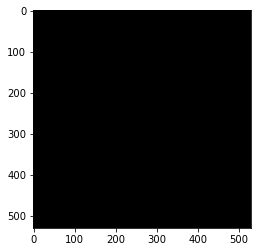

In [207]:
# Random get one from X and y

plot_gif(X[56], '../22956814/gif/test_56_raw.gif')
plot_gif(y[56], '../22956814/gif/test_56_mask.gif')  # looks good, although not all detected